In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from collections import Counter
import tensorflow as tf

from tensorflow.keras.layers import Dense, Flatten, Conv2D, Normalization, ReLU, Dropout
from tensorflow.keras import Model, regularizers
from collections import Counter

import os
data_path = '/data/wang_sc/datasets/PAMAP2_Dataset/Processed0/'

# %%
train_x = np.load(data_path + 'x_train.npy').astype(np.float32)
train_y = np.load(data_path + 'y_train.npy').astype(np.int32)
test_x = np.load(data_path + 'x_test.npy').astype(np.float32)
test_y = np.load(data_path + 'y_test.npy').astype(np.int32)
num_classes = len(Counter(train_y.tolist()))

train_shape = train_x.shape
test_shape = test_x.shape
scaler = StandardScaler()
train_x = scaler.fit_transform(
train_x.astype(np.float32).reshape(-1,1)).reshape(train_shape[0], train_shape[1], train_shape[2], 1)
test_x = scaler.transform(
test_x.astype(np.float32).reshape(-1,1)).reshape(test_shape[0], test_shape[1], test_shape[2], 1)

2023-12-26 20:51:00.702645: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-26 20:51:00.897077: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-26 20:51:01.669933: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.4/lib64
2023-12-26 20:51:01.670066: W tensorflow/compiler/xla/stream

In [2]:
import random

index = random.randint(0, 3000)
model = tf.keras.models.load_model('/data/wang_sc/HAR-With-SmartWatch/LIMUNet_trained.h5')
test_data = test_x[index:index+5]
test_label = test_y[index:index+5]
intermediate_layer_model = Model(inputs=model.input, outputs=model.layers[37].output)#16,34
intermediate_output = intermediate_layer_model.predict(test_data)

print(intermediate_output.shape)
print(intermediate_output)


2023-12-26 20:51:04.140830: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-26 20:51:07.033981: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22288 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:25:00.0, compute capability: 8.6
2023-12-26 20:51:07.035543: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 22288 MB memory:  -> device: 1, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:5b:00.0, compute capability: 8.6
2023-12-26 20:51:07.036900: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localho

1/1 [==============================] - 4s 4s/step
(5, 9)
[[25.36051    9.890942   4.1254606  0.        12.468768   0.
   0.         0.         0.       ]
 [23.816078   8.808794   3.052809   0.        13.351485   0.
   0.         0.         0.       ]
 [32.675224  10.742935   7.627033   0.        15.608146   0.
   0.         0.         0.       ]
 [27.09288    9.601267   5.117621   0.        13.578912   0.
   0.         0.         0.       ]
 [24.294884   8.932045   2.9118085  0.        13.762831   0.
   0.         0.         0.       ]]


2023-12-26 20:51:11.986613: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


maxval = 25.360509872436523, minval = 0.0
25.36051
9.890942
4.1254606
0.0
12.468768
0.0
0.0
0.0
0.0


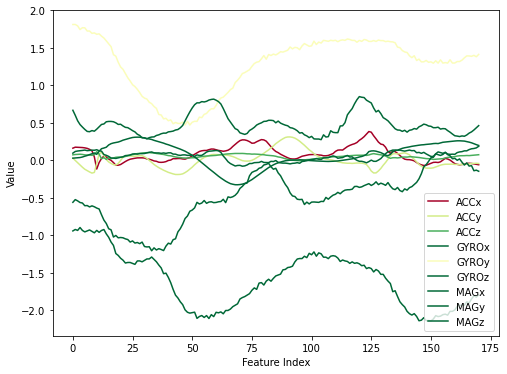

maxval = 23.816078186035156, minval = 0.0
23.816078
8.808794
3.052809
0.0
13.351485
0.0
0.0
0.0
0.0


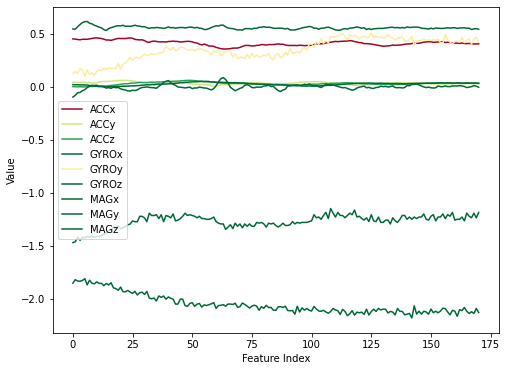

maxval = 32.67522430419922, minval = 0.0
32.675224
10.742935
7.627033
0.0
15.608146
0.0
0.0
0.0
0.0


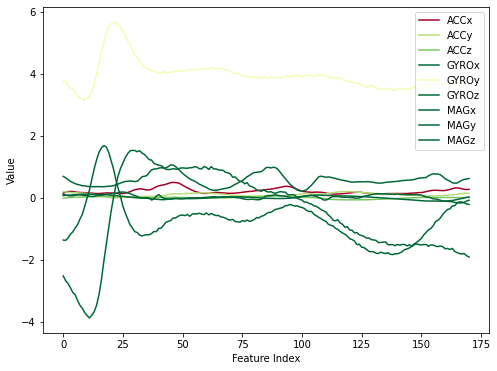

maxval = 27.092880249023438, minval = 0.0
27.09288
9.601267
5.117621
0.0
13.578912
0.0
0.0
0.0
0.0


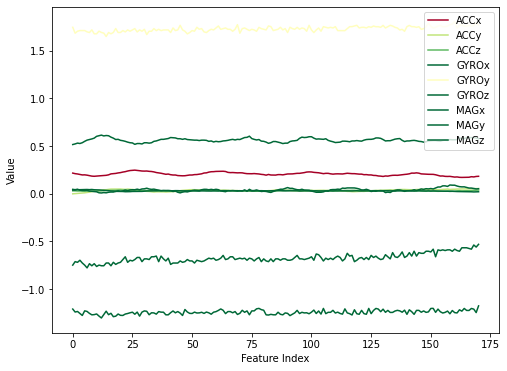

maxval = 24.294883728027344, minval = 0.0
24.294884
8.932045
2.9118085
0.0
13.762831
0.0
0.0
0.0
0.0


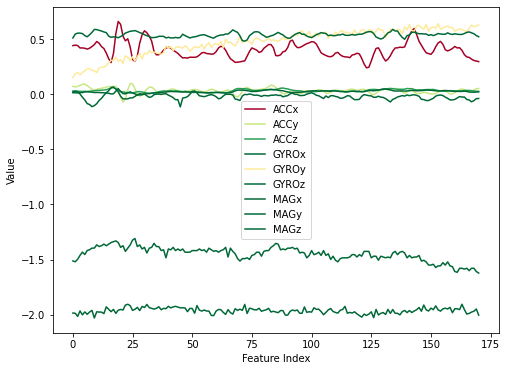

In [4]:
import matplotlib.pyplot as plt

# 假设你有一个大小为 (171, 9, 1) 的张量 data
# data = ...
labels =["ACCx", "ACCy", "ACCz", "GYROx", "GYROy", "GYROz", "MAGx", "MAGy", "MAGz"]
# 获取数据的形状
num_samples, num_points, num_curves,_ = test_data.shape

# 定义颜色映射范围（根据向量中的数字进行映射）


# 遍历每个样本
for sample_index in range(num_samples):
    min_value = np.min(intermediate_output[sample_index])
    max_value = np.max(intermediate_output[sample_index])
    print(f"maxval = {max_value}, minval = {min_value}")
    plt.figure(figsize=(8, 6))

    # 遍历每条曲线
    for curve_index in range(num_curves):
        print(intermediate_output[sample_index][curve_index])
        # 获取当前点的向量
        vector = test_data[sample_index, :, curve_index].flatten()

        # 根据向量中的数字确定颜色
        color = (intermediate_output[sample_index][curve_index] - min_value) / (max_value - min_value)  # 归一化到 [0, 1] 范围
        color = plt.cm.RdYlGn(1-color)  # 使用RdYlGn颜色映射

        # 绘制曲线
        plt.plot(vector, label=labels[curve_index], color=color)

    # plt.title(f'Sample {sample_index}')
    plt.xlabel('Feature Index')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

140/140 [==============================] - 1s 5ms/step
[ 1  5 10 ...  9  1  6]
[ 1  5 10 ...  9  1  6]


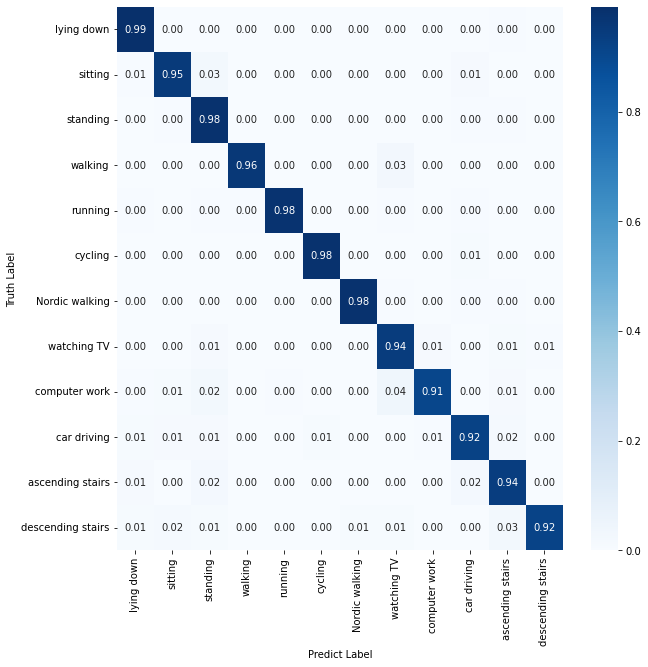

In [18]:
# 混淆矩阵部分
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow.keras.models import load_model

from sklearn.preprocessing import StandardScaler

# 加载模型
model = load_model('/data/wang_sc/HAR-With-SmartWatch/attention_based/LIMUNet_trained.h5')

# 准备数据
# X_test, y_test 应该是您的测试数据集和对应的标签
data_path = '/data/wang_sc/datasets/PAMAP2_Dataset/Processed0/'

X_test = np.load(data_path + 'x_test.npy').astype(np.float32)
y_test = np.load(data_path + 'y_test.npy').astype(np.int32)
# 对测试集进行预测

test_shape = X_test.shape
scaler = StandardScaler()
X_test = scaler.fit_transform(
X_test.astype(np.float32).reshape(-1,1)).reshape(test_shape[0], test_shape[1], test_shape[2], 1)


y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = y_test
print(y_test)
print(y_pred_classes)
# 计算混淆矩阵
cm = confusion_matrix(y_true, y_pred_classes)


# 将混淆矩阵转换为百分比形式
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# class_labels = ["sitting", "standing", "walking", "lying down", "skipping rope", "running", "ascending stairs", \
#                 "descending stairs", " jumping back and forth", "waving hands", "computer work", "opening and closing doors", \
#                 "wiping windows", "washing hands"]
class_labels = ["lying down", "sitting", "standing", "walking", "running", "cycling", "Nordic walking", \
                "watching TV", "computer work", "car driving", "ascending stairs", "descending stairs"]

# 绘制混淆矩阵
plt.figure(figsize=(10,10))
sns.heatmap(cm_percentage, annot=True, fmt='.2f', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.ylabel('Truth Label')
plt.xlabel('Predict Label')
plt.show()
